In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn import utils
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import r2_score
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

import warnings # supress warnings
warnings.filterwarnings('ignore')

,quality,bits,intra_parts,skip_parts,inter_16x16_parts,inter_4x4_parts,inter_other_parts,non_zero_pixels,frame_width,frame_height,movement_level,mean,sub_mean_1,sub_mean_2,sub_mean_3,sub_mean_4,var_sub_blocks,sobel_h,sobel_v,variance,block_movement_h,block_movement_v,var_movement_h,var_movement_v,cost_1,cost_2,relevant
quality,1.000000,-0.546169,-0.087735,0.314105,0.117103,-0.202867,-0.332356,-0.542825,0.000000,0.000000,-0.078585,-0.037923,-0.109712,-0.121234,-0.114808,-0.132473,0.044705,-0.155368,-0.142616,0.016378,-0.043886,-0.060255,0.010829,0.004486,0.278340,0.302272,-0.250797
bits,-0.546169,1.000000,0.265597,-0.440523,-0.207900,0.301425,0.476383,0.984354,-0.182503,-0.171839,-0.128677,0.106659,0.534790,0.533225,0.533039,0.552107,0.182950,0.662347,0.666244,0.409231,0.058784,0.097869,0.019102,0.042710,0.165720,0.169413,0.252393
intra_parts,-0.087735,0.265597,1.000000,-0.326240,-0.373677,-0.186377,-0.293409,0.228438,0.341633,0.357337,0.364317,0.061530,0.402977,0.423291,0.420821,0.422763,0.209951,0.531125,0.519474,0.348958,-0.025600,-0.025407,0.042576,0.083751,0.058709,0.065097,0.075806
skip_parts,0.314105,-0.440523,-0.326240,1.000000,-0.171666,-0.237137,-0.402348,-0.400267,0.117658,0.105322,0.053325,-0.056202,-0.338364,-0.346657,-0.334961,-0.338645,-0.135901,-0.425004,-0.422798,-0.235510,-0.190260,-0.254021,-0.093935,-0.107849,-0.148841,-0.179376,-0.241371
inter_16x16_parts,0.117103,-0.207900,-0.373677,-0.171666,1.000000,-0.130936,-0.227767,-0.198486,-0.185032,-0.197051,-0.212854,-0.040152,-0.158050,-0.168892,-0.184536,-0.187951,-0.072257,-0.232083,-0.227630,-0.126078,0.114631,0.108944,0.020213,-0.023771,-0.009213,-0.005751,-0.010243
inter_4x4_parts,-0.202867,0.301425,-0.186377,-0.237137,-0.130936,1.000000,0.477455,0.291482,-0.205913,-0.203215,-0.172819,0.020451,0.088353,0.093017,0.099538,0.107402,0.029221,0.132079,0.140151,0.073202,-0.025550,-0.000024,-0.032235,-0.027145,0.062338,0.078866,0.114044
inter_other_parts,-0.332356,0.476383,-0.293409,-0.402348,-0.227767,0.477455,1.000000,0.448316,-0.352369,-0.344268,-0.281927,0.036059,0.138760,0.133042,0.136239,0.136773,0.010735,0.187012,0.200816,0.071157,0.070045,0.136922,0.006803,0.017208,0.124861,0.147068,0.195646
non_zero_pixels,-0.542825,0.984354,0.228438,-0.400267,-0.198486,0.291482,0.448316,1.000000,-0.183518,-0.173210,-0.130551,0.100306,0.507107,0.509783,0.509924,0.532519,0.160196,0.627380,0.630350,0.372422,0.039560,0.080188,0.006165,0.029775,0.140118,0.142194,0.236884
frame_width,0.000000,-0.182503,0.341633,0.117658,-0.185032,-0.205913,-0.352369,-0.183518,1.000000,0.996333,0.944759,-0.004327,0.021110,0.072010,0.048446,0.046536,0.066384,0.087972,0.065921,0.039313,0.190191,0.216532,0.133052,0.208272,-0.273047,-0.283572,-0.148213
frame_height,0.000000,-0.171839,0.357337,0.105322,-0.197051,-0.203215,-0.344268,-0.173210,0.996333,1.000000,0.964464,-0.001996,0.037557,0.086566,0.065706,0.060610,0.078928,0.107478,0.085894,0.056846,0.177652,0.233182,0.131463,0.221566,-0.258260,-0.267458,-0.137324


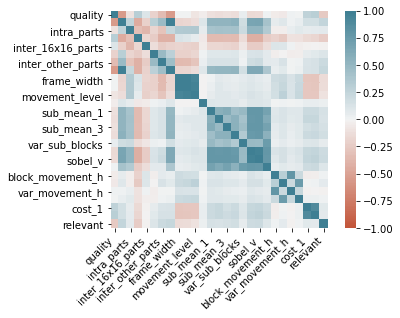

In [2]:
#Read the dataSet
df = pd.read_csv('data.csv')
np.random.seed(8)

corrMatrix = df.corr()
ax = sns.heatmap(
    corrMatrix, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

corrMatrix.style.background_gradient(cmap='coolwarm')

In [3]:
print(df['relevant'].value_counts())

1.0    13156
0.0     2842
Name: relevant, dtype: int64


In [4]:
#There is null values in sub_mean_3
df.pop('block_movement_h')
df.pop('block_movement_v')
df.pop('var_movement_h')
df.pop('var_movement_v')
df.pop('cost_1')
df.pop('cost_2')
df.pop('inter_16x16_parts')
df.pop('movement_level')
df.pop('mean')
df.pop('var_sub_blocks')
print(df)
print(df.isnull().any())
print(np.any(np.isnan(df))) 
print(np.all(np.isfinite(df)))

       quality  bits  intra_parts  skip_parts  inter_4x4_parts  \
0           22  2143            0           0                3   
1           22  1735            0           2                3   
2           22  1971            0           0                0   
3           22  2473            0           0               18   
4           22  1093            0           0                3   
...        ...   ...          ...         ...              ...   
15995       37    66           16           1                9   
15996       37   100           32           0               18   
15997       37   141           16           1                0   
15998       37   335           16           0                6   
15999       37   226           32           0                0   

       inter_other_parts  non_zero_pixels  frame_width  frame_height  \
0                     21              404          416           240   
1                      8              381          416         

In [5]:
cat_mask = (df.dtypes==object)
cat_cols = df.columns[cat_mask].tolist()
df_cat = df[cat_cols]
df_num = df.drop(cat_cols,axis=1)
#There is not categorical variables
print(df_cat)
print(df_num)
print(np.any(np.isnan(df_num))) 
print(np.all(np.isfinite(df_num)))

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[16000 rows x 0 columns]
       quality  bits  intra_parts  skip_parts  inter_4x4_parts  \
0           22  2143            0           0                3   
1           22  1735            0           2                3   
2           22  1971            0           0                0   
3           22  2473            0           0               18   
4           22  1093            0           0                3   
...        ...   ...          ...         ...              ...   
15995       37    66           16           1                9   
15996       37 

In [6]:
imp_num = SimpleImputer(strategy='mean')
columns = df_num.columns
index = df_num.index
df_num = pd.DataFrame(imp_num.fit_transform(df_num),columns=columns,index=index)
df_preprocessed=df_num
df_preprocessed=df_preprocessed.astype(int)
print(df_preprocessed.astype(int))
print(df_preprocessed.isnull().any())
print(np.any(np.isnan(df_preprocessed))) 
print(np.all(np.isfinite(df_preprocessed)))

       quality  bits  intra_parts  skip_parts  inter_4x4_parts  \
0           22  2143            0           0                3   
1           22  1735            0           2                3   
2           22  1971            0           0                0   
3           22  2473            0           0               18   
4           22  1093            0           0                3   
...        ...   ...          ...         ...              ...   
15995       37    66           16           1                9   
15996       37   100           32           0               18   
15997       37   141           16           1                0   
15998       37   335           16           0                6   
15999       37   226           32           0                0   

       inter_other_parts  non_zero_pixels  frame_width  frame_height  \
0                     21              404          416           240   
1                      8              381          416         

In [10]:
df_columns=df_preprocessed.columns
mms = MinMaxScaler()
df_preprocessed = mms.fit_transform(df_preprocessed)
df_preprocessed=pd.DataFrame(df_preprocessed)
df.columns=df_columns
cols_names={0:"quality",
            1:"bits",
            2:"intra_parts",
            3:"skip_parts",
            4:"inter_4x4_parts",
            5:"inter_other_parts",
            6:"non_zero_pixels",
            7:"frame_width",
            8:"frame_height",
            9:"sub_mean_1",
            10:"sub_mean_2",
            11:"sub_mean_3",
            12:"sub_mean_4",
            13:"sobel_h",
            14:"sobel_v",
            15:"variance",
            16:"relevant"
}
df_preprocessed=df_preprocessed.rename(columns=cols_names)
print(df_preprocessed)

       quality      bits  intra_parts  skip_parts  inter_4x4_parts  \
0          0.0  0.449172         0.00        0.00         0.090909   
1          0.0  0.363655         0.00        0.50         0.090909   
2          0.0  0.413121         0.00        0.00         0.000000   
3          0.0  0.518340         0.00        0.00         0.545455   
4          0.0  0.229092         0.00        0.00         0.090909   
...        ...       ...          ...         ...              ...   
15995      1.0  0.013834         0.25        0.25         0.272727   
15996      1.0  0.020960         0.50        0.00         0.545455   
15997      1.0  0.029554         0.25        0.25         0.000000   
15998      1.0  0.070216         0.25        0.00         0.181818   
15999      1.0  0.047370         0.50        0.00         0.000000   

       inter_other_parts  non_zero_pixels  frame_width  frame_height  \
0               0.777778         0.487923          0.0           0.0   
1              

In [12]:
y=df_preprocessed.relevant
X = df_preprocessed.drop('relevant', axis=1)

In [13]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [14]:
#x_train_rf, x_test_rf, y_train_rf, y_test_rf = train_test_split(df_preprocessed,df_preprocessed[16], test_size=0.3)

In [15]:
#x_train_nb, x_test_nb, y_train_nb, y_test_nb = train_test_split(df_preprocessed,df_preprocessed[16], test_size=0.3)

In [16]:
#x_train_svm, x_test_svm, y_train_svm, y_test_svm = train_test_split(df_preprocessed,df_preprocessed[16], test_size=0.3)

In [17]:
X = pd.concat([x_train, y_train], axis=1)

In [20]:
not_relevant = X[X.relevant==0]
relevant = X[X.relevant==1]

In [26]:
relevant_upsampled = resample(relevant,
                          replace=True, # sample with replacement
                          n_samples=len(not_relevant), # match number in majority class
                          random_state=27) # reproducible results
upsampled = pd.concat([not_relevant, relevant_upsampled])

In [28]:
upsampled.relevant.value_counts()

1.0    2009
0.0    2009
Name: relevant, dtype: int64

In [29]:
y_train = upsampled.relevant
x_train = upsampled.drop('relevant', axis=1)

In [33]:
reg = LinearRegression().fit(x_train, y_train)
prediction=reg.predict(x_test)
y_test_array=y_test.to_numpy()
for i in range(len(prediction)):
    prediction[i]=int(prediction[i])
print(accuracy_score(y_test, prediction))
print(classification_report(y_test, prediction))

0.21833333333333332
              precision    recall  f1-score   support

         0.0       0.18      1.00      0.31       835
         1.0       1.00      0.05      0.10      3965

    accuracy                           0.22      4800
   macro avg       0.59      0.53      0.21      4800
weighted avg       0.85      0.22      0.14      4800



In [34]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(x_train,y_train)
y_pred_rf= rf.predict(x_test)
y_test_array_rf=y_test.to_numpy()
for i in range(len(y_pred_rf)):
    y_pred_rf[i]=int(y_pred_rf[i])
accuracy_score(y_test, y_pred_rf)
print(accuracy_score(y_test, y_pred_rf))

0.18229166666666666


In [36]:
conf_rf = pd.DataFrame(
    confusion_matrix(y_test,y_pred_rf),
    columns=['Prediction 0', 'Prediction 1'],
    index=['True 0', 'True 1']
)
print(conf_rf)
print()
print(classification_report(y_test,y_pred_rf))
print()

        Prediction 0  Prediction 1
True 0           834             1
True 1          3924            41

              precision    recall  f1-score   support

         0.0       0.18      1.00      0.30       835
         1.0       0.98      0.01      0.02      3965

    accuracy                           0.18      4800
   macro avg       0.58      0.50      0.16      4800
weighted avg       0.84      0.18      0.07      4800




In [15]:
nb=GaussianNB()
nb.fit(x_train, y_train)
y_pred_nb_gaussian=nb.predict(x_test)
accuracy_score(y_test, y_pred_nb_gaussian)

1.0
        Predicted 0  Prediction 1
True 0         1306             0
True 1            0          1877

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1306
         1.0       1.00      1.00      1.00      1877

    accuracy                           1.00      3183
   macro avg       1.00      1.00      1.00      3183
weighted avg       1.00      1.00      1.00      3183


